In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import font_manager
font = font_manager.FontProperties("Microsoft YaHei")

In [9]:
data = pd.read_excel("./04-身分別及繳交方式資料檔.xlsx")

dup = data[data.duplicated(["姓名","身分證"])]
for d in dup["姓名"]:
    temp = data[data["姓名"]==d]
    print(temp)
    print(f"=====以上共{temp.shape[0]}筆=====\n")

dup.drop(columns=["報名序號","身分別","繳交方式"]).to_excel("./輸出一.xlsx", index=False)
print(f"{dup.shape[0]}位考生名單已輸出")

           報名序號   姓名         身分證    身分別 繳交方式
118  1040010119  涂玉玲  F150369603  108課綱  PDF
264  1040010265  涂玉玲  F150369603  108課綱  PDF
=====以上共2筆=====

           報名序號   姓名         身分證    身分別  繳交方式
79   1040010080  蔡偉智  A158737582  108課綱  學習歷程
285  1040010286  蔡偉智  A158737582  108課綱   PDF
=====以上共2筆=====

           報名序號   姓名         身分證    身分別  繳交方式
88   1040010089  管苑芷  D246595640  108課綱  學習歷程
287  1040010288  管苑芷  D246595640  108課綱   PDF
=====以上共2筆=====

           報名序號   姓名         身分證    身分別  繳交方式
82   1040010083  林翰皓  A182709047  108課綱   PDF
319  1040010320  林翰皓  A182709047  108課綱  學習歷程
=====以上共2筆=====

4位考生名單已輸出


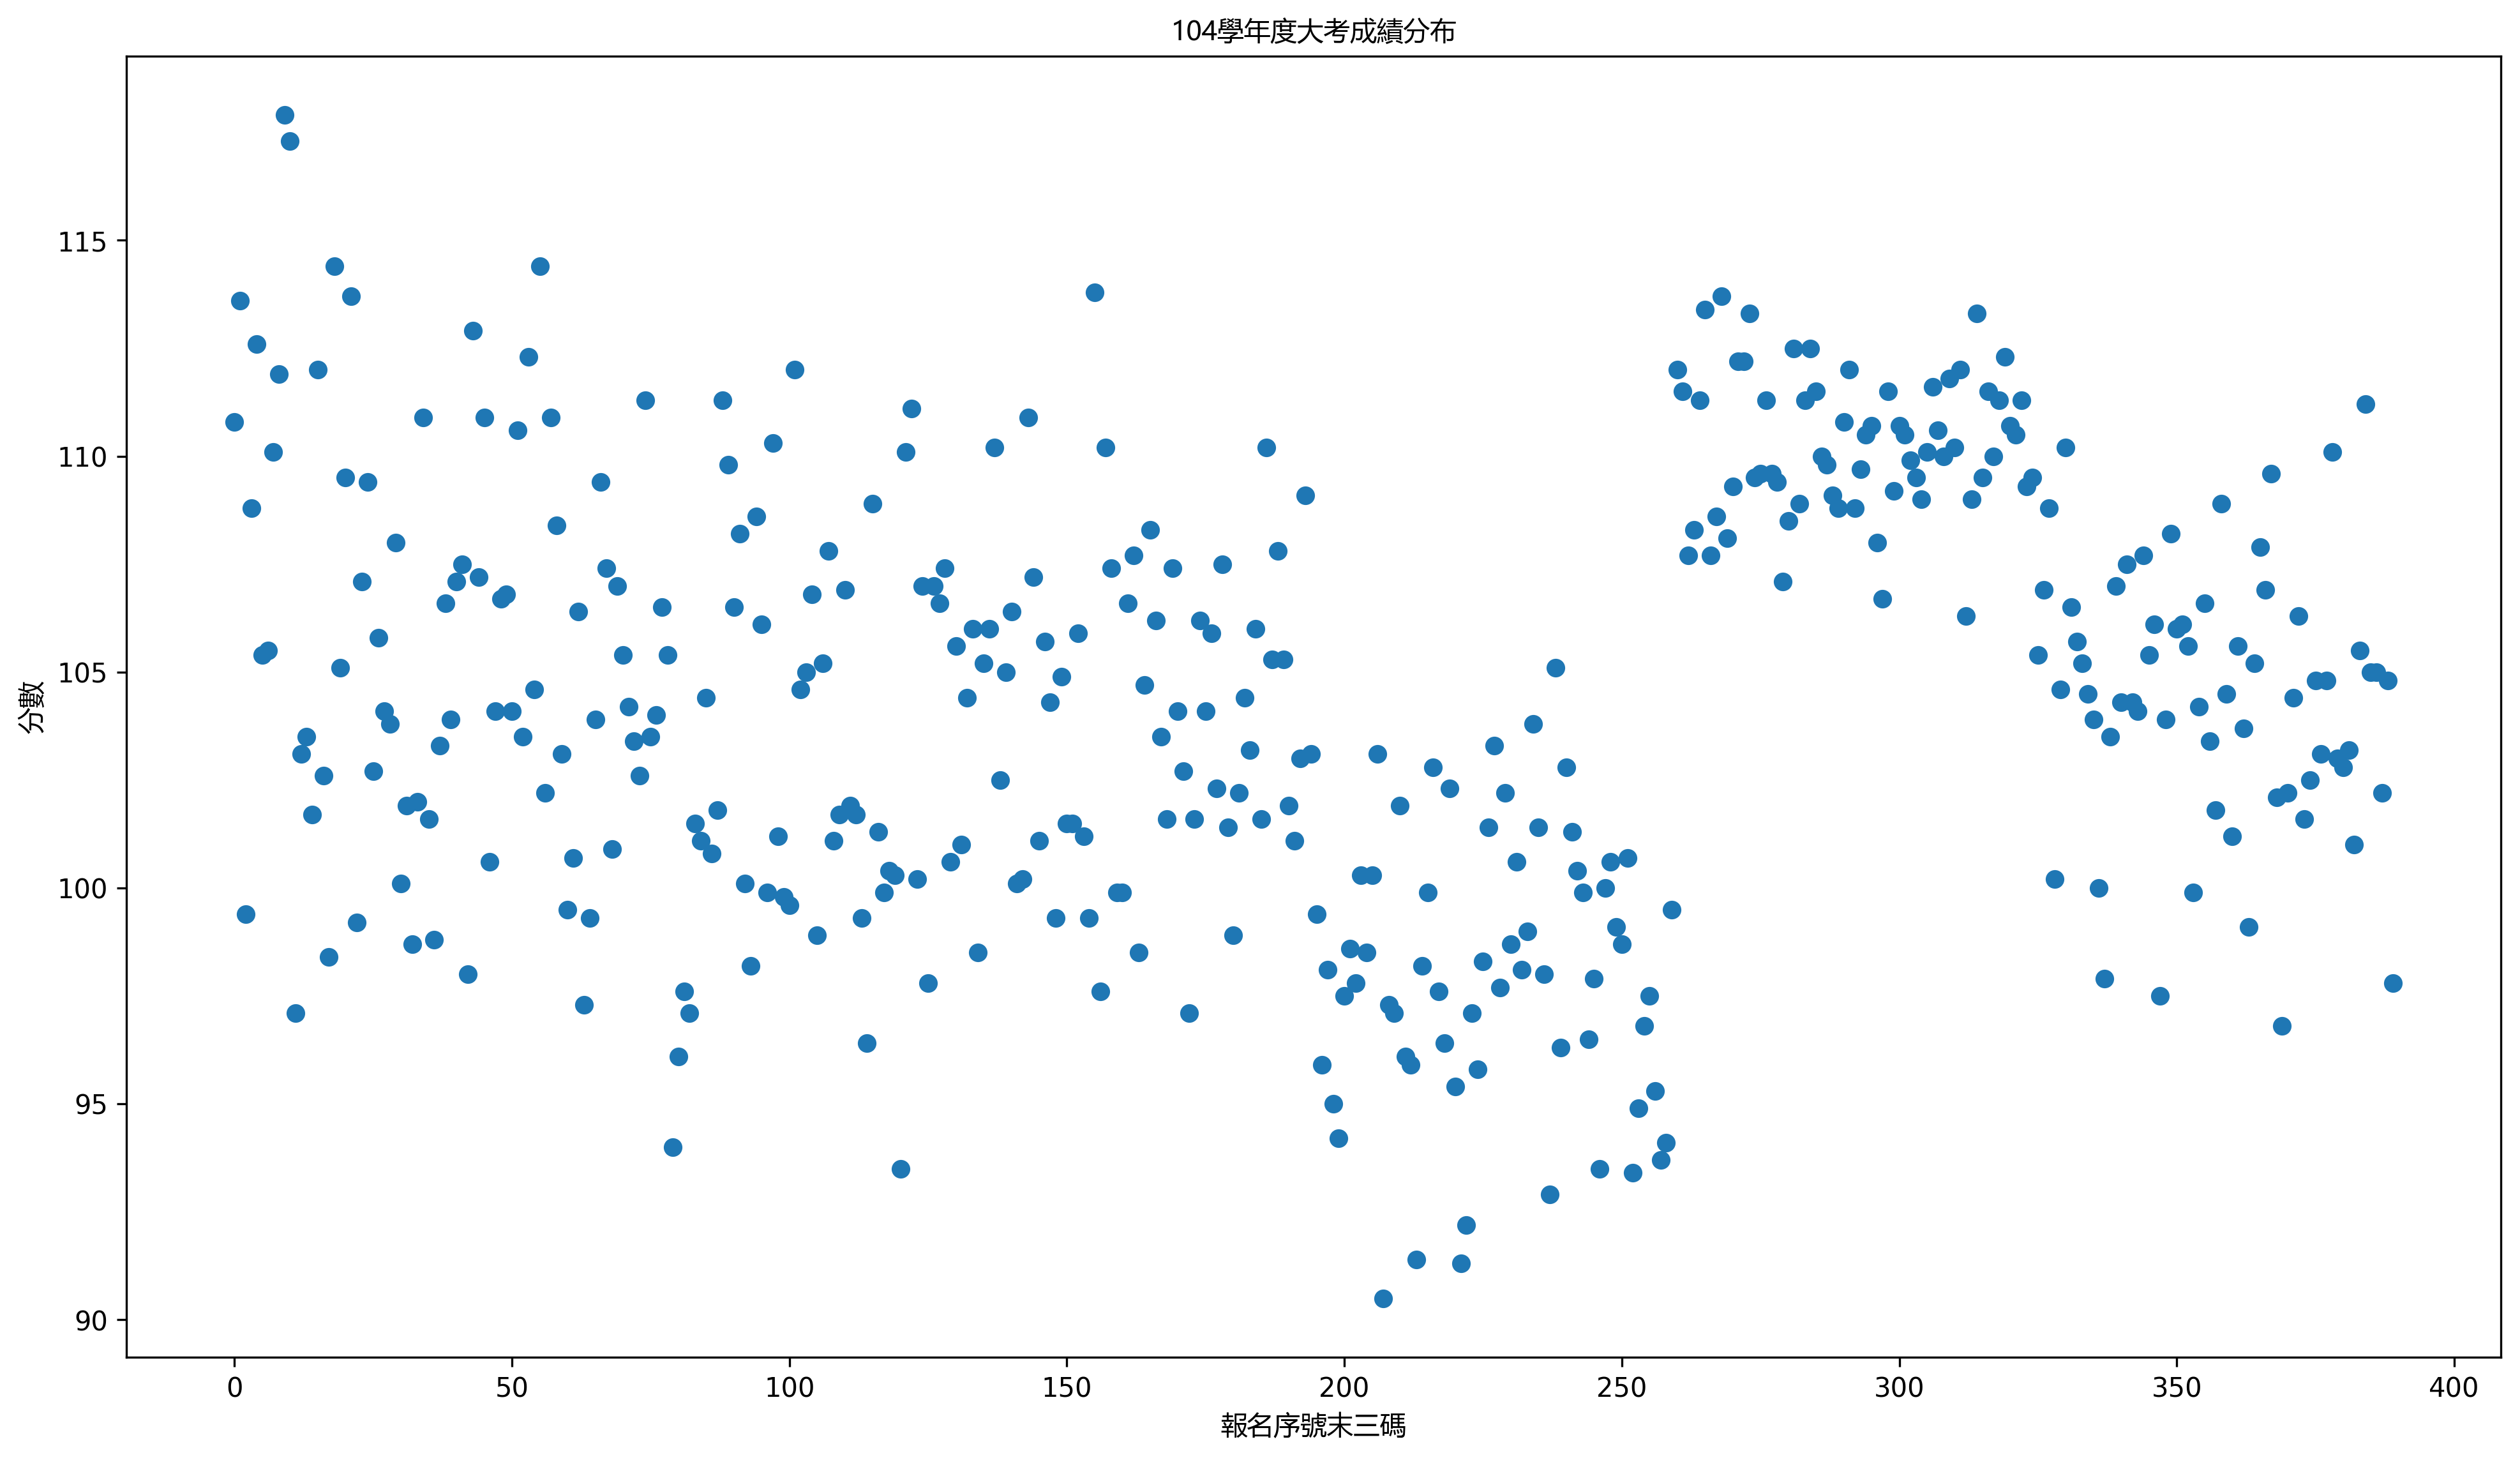

In [2]:
data = pd.read_excel("./03-甄選入學_學生學習歷程面向與分數資料表-練習檔.xlsx")

score = data.groupby("報名序號").apply(lambda x:x["分數"]*x["總成績佔比"]).groupby("報名序號").agg("sum").reset_index()

x = score["報名序號"].apply(lambda x:str(x)[-3:]).to_numpy()
y = score[0].to_numpy()

plt.figure(figsize=(16,9), dpi=300)
plt.xticks(np.arange(0,401,50),labels=np.arange(0,401,50))
plt.title("104學年度大考成績分布", font=font)
plt.xlabel("報名序號末三碼",font=font)
plt.ylabel("分數", font=font)
plt.scatter(x, y)
plt.show()

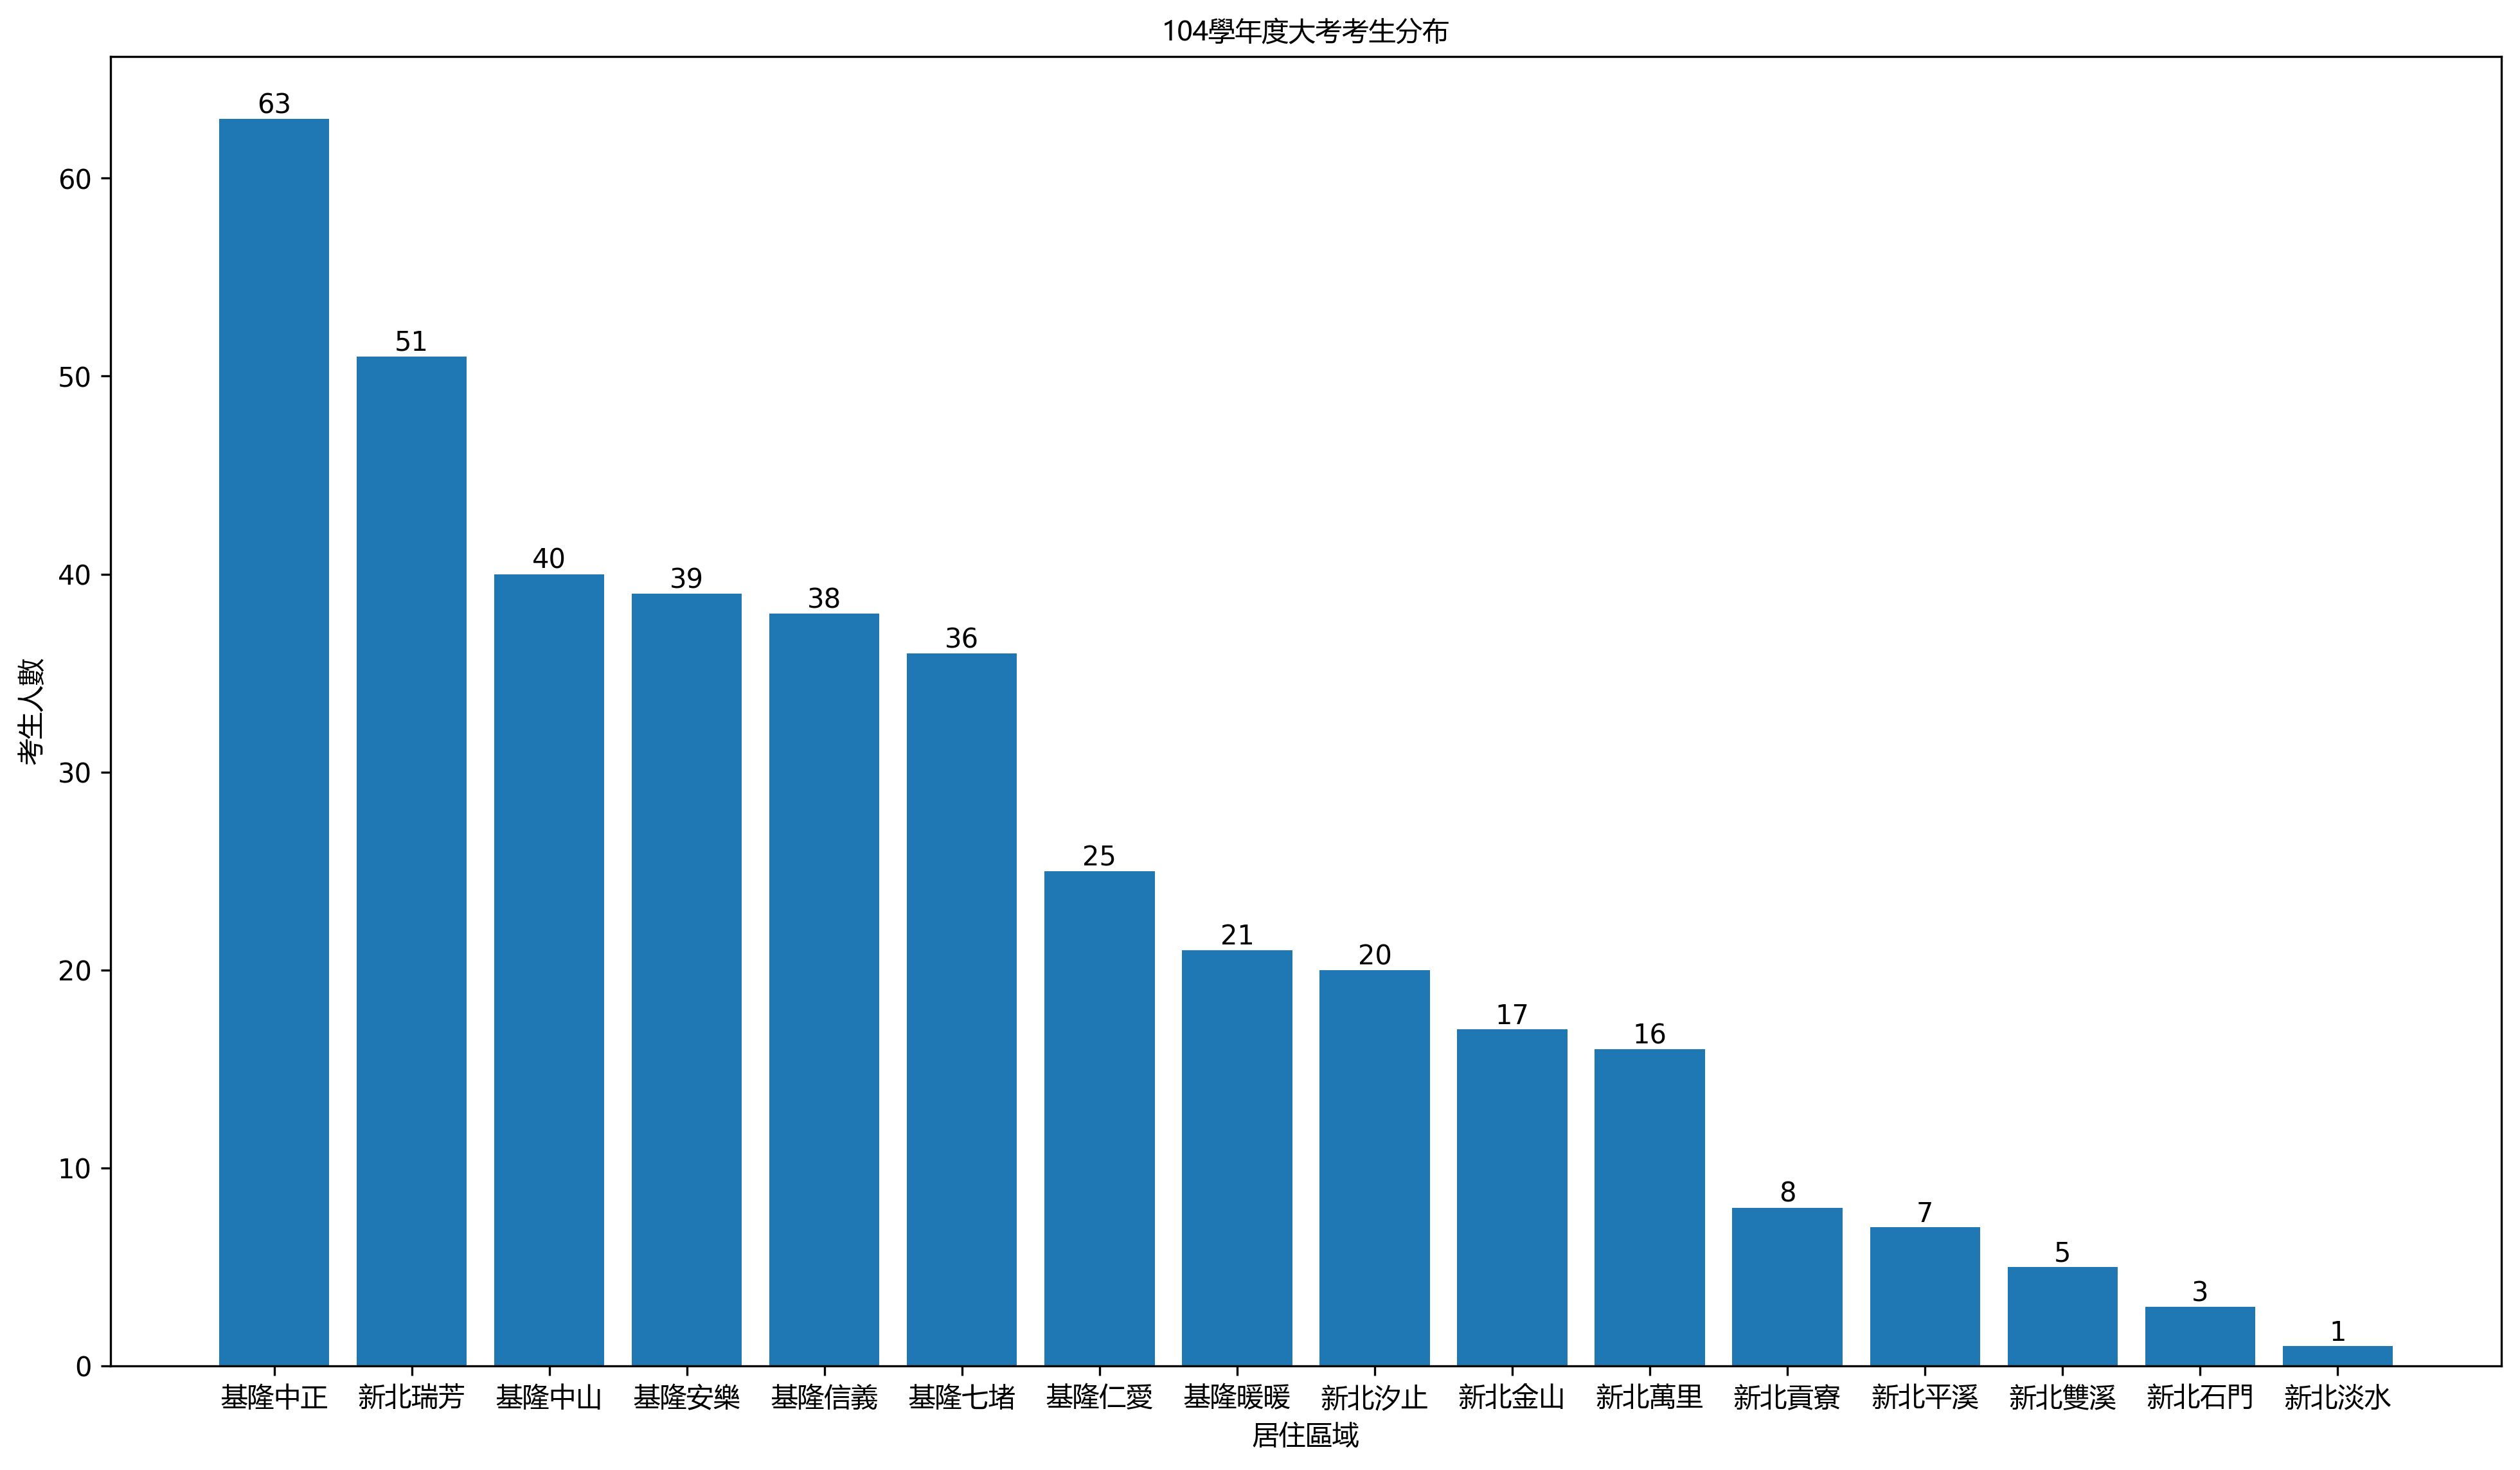

In [3]:
data = pd.read_excel("./01-練習題-(初階)數據處理及分析.xlsx", sheet_name="1-3切割")

temp = data[~data.duplicated(subset="郵遞區號")]
locate = {f"{x}":f"{y[:2]}{y[3:5]}" for x, y in zip(temp["郵遞區號"], temp["住址"])}

temp = data.groupby("郵遞區號").count().reset_index().sort_values("姓名", ascending=False)

x = temp["郵遞區號"].apply(lambda x:str(x)).to_numpy()
y = temp["姓名"].to_numpy()

plt.figure(figsize=(16,9), dpi=300)
plt.title("104學年度大考考生分布", font=font)
plt.xlabel("居住區域",font=font)
plt.ylabel("考生人數", font=font)
plt.bar_label(plt.bar(x, y), y)
plt.xticks(x, list(map(lambda t:locate[t], x)), font=font)
plt.show()